# 단일 표본 T-Test (One Sample T-Test)

## #01. 준비작업

### [1] 패키지 참조


In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from my_helper.util import *
from my_helper.plot import *
from my_helper.analysis import *

from pandas import melt

## #02. 예제(1) - 단일표본 T검정 : 강아지 체온 변화

### [1] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/temperature.xlsx", info=False)
origin.head()

,체온
0,25.8
1,24.6
2,26.1
3,22.9
4,25.1


### [2] 신뢰구간 확인


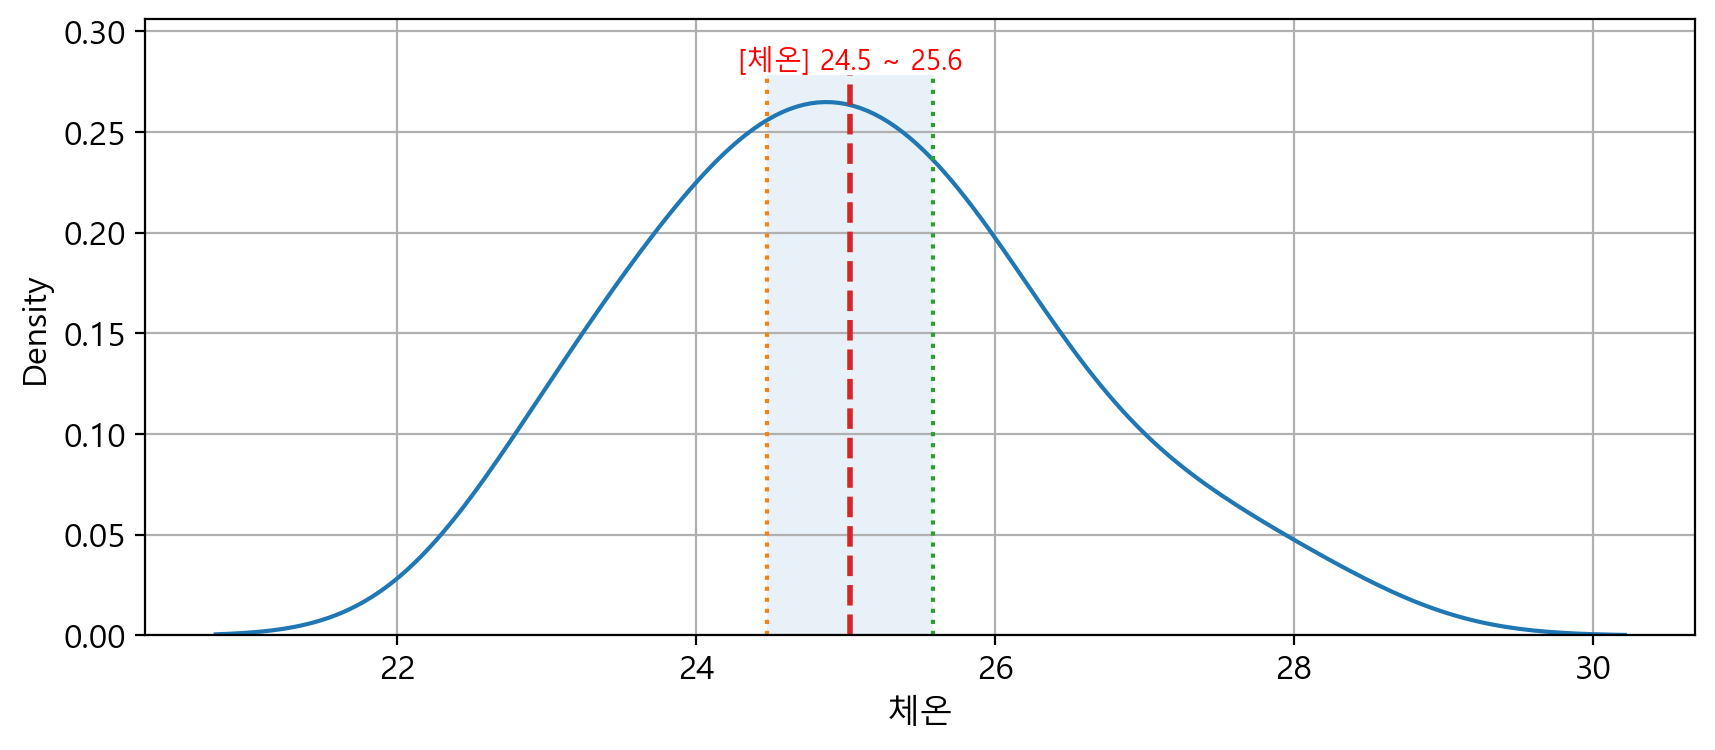

In [3]:
my_kde_confidence_interval(origin)

### [3] 데이터의 정규성 검정


In [4]:
my_normal_test(origin)

[normaltest-체온] statistic: 0.819, p-value: 0.664, 정규성 충족 여부: True


> `p-value`가 `0.664`이므로 ($P > 0.05$) 정규성을 충족한다.


### [4] 강아지의 평균 체온이 이전에 알려져 있던 `24.3`과 달려졌는지 여부


In [5]:
my_ttest_1samp(origin, 24.3)

+-----------------------+-------------+-----------+-------+-------+------------------+
|                       |   statistic |   p-value | H0    | H1    | interpretation   |
|-----------------------+-------------+-----------+-------+-------+------------------|
| ('체온', 'two-sided') |       2.713 |     0.012 | False | True  | μ != 24.3        |
| ('체온', 'less')      |       2.713 |     0.994 | True  | False | μ >= 24.3        |
| ('체온', 'greater')   |       2.713 |     0.006 | False | True  | μ > 24.3         |
+-----------------------+-------------+-----------+-------+-------+------------------+


## 예제 (2) - 독립 표본 T검정 : 지혈제 효과 비교

### [1] 데이터 가져오기

In [6]:
origin = my_read_excel("https://data.hossam.kr/mldata/styptic.xlsx", info=False)
my_pretty_table(origin.head())

+----+-----+------+
|    |   B |    G |
|----+-----+------|
|  0 | 8.8 |  9.9 |
|  1 | 8.9 |   10 |
|  2 | 8.4 |    9 |
|  3 | 7.9 | 11.1 |
|  4 | 8.2 |  9.8 |
+----+-----+------+


### [2] 정규성, 등분산성 검정

In [7]:
df = melt(origin)
my_pretty_table(df.head())

+----+------------+---------+
|    | variable   |   value |
|----+------------+---------|
|  0 | B          |     8.8 |
|  1 | B          |     8.9 |
|  2 | B          |     8.4 |
|  3 | B          |     7.9 |
|  4 | B          |     8.2 |
+----+------------+---------+


In [8]:
my_normal_equal_var_1field(df, xname='value', hue='variable')

+----------+-------------+-----------+----------+
| field    |   statistic |   p-value | result   |
|----------+-------------+-----------+----------|
| B        |   0.0832685 |  0.959221 | True     |
| G        |     0.20095 |  0.904408 | True     |
| Bartlett |    0.555515 |  0.456073 | True     |
+----------+-------------+-----------+----------+


### [3] 독립표본 T검정

In [9]:
my_ttest_ind(origin, 'B', 'G', equal_var=True)

+-----------------------------+-------------+-----------+-------+-------+------------------+
|                             |   statistic |   p-value | H0    | H1    | interpretation   |
|-----------------------------+-------------+-----------+-------+-------+------------------|
| ('t-test_ind', 'two-sided') |       -4.35 |         0 | False | True  | μ(B) != μ(G)     |
| ('t-test_ind', 'less')      |       -4.35 |         0 | False | True  | μ(B) < μ(G)      |
| ('t-test_ind', 'greater')   |       -4.35 |         1 | True  | False | μ(B) <= μ(G)     |
+-----------------------------+-------------+-----------+-------+-------+------------------+


### [4] 검정 결과 시각화

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B vs. G: t-test independent samples, P_val:3.862e-04 t=-4.350e+00


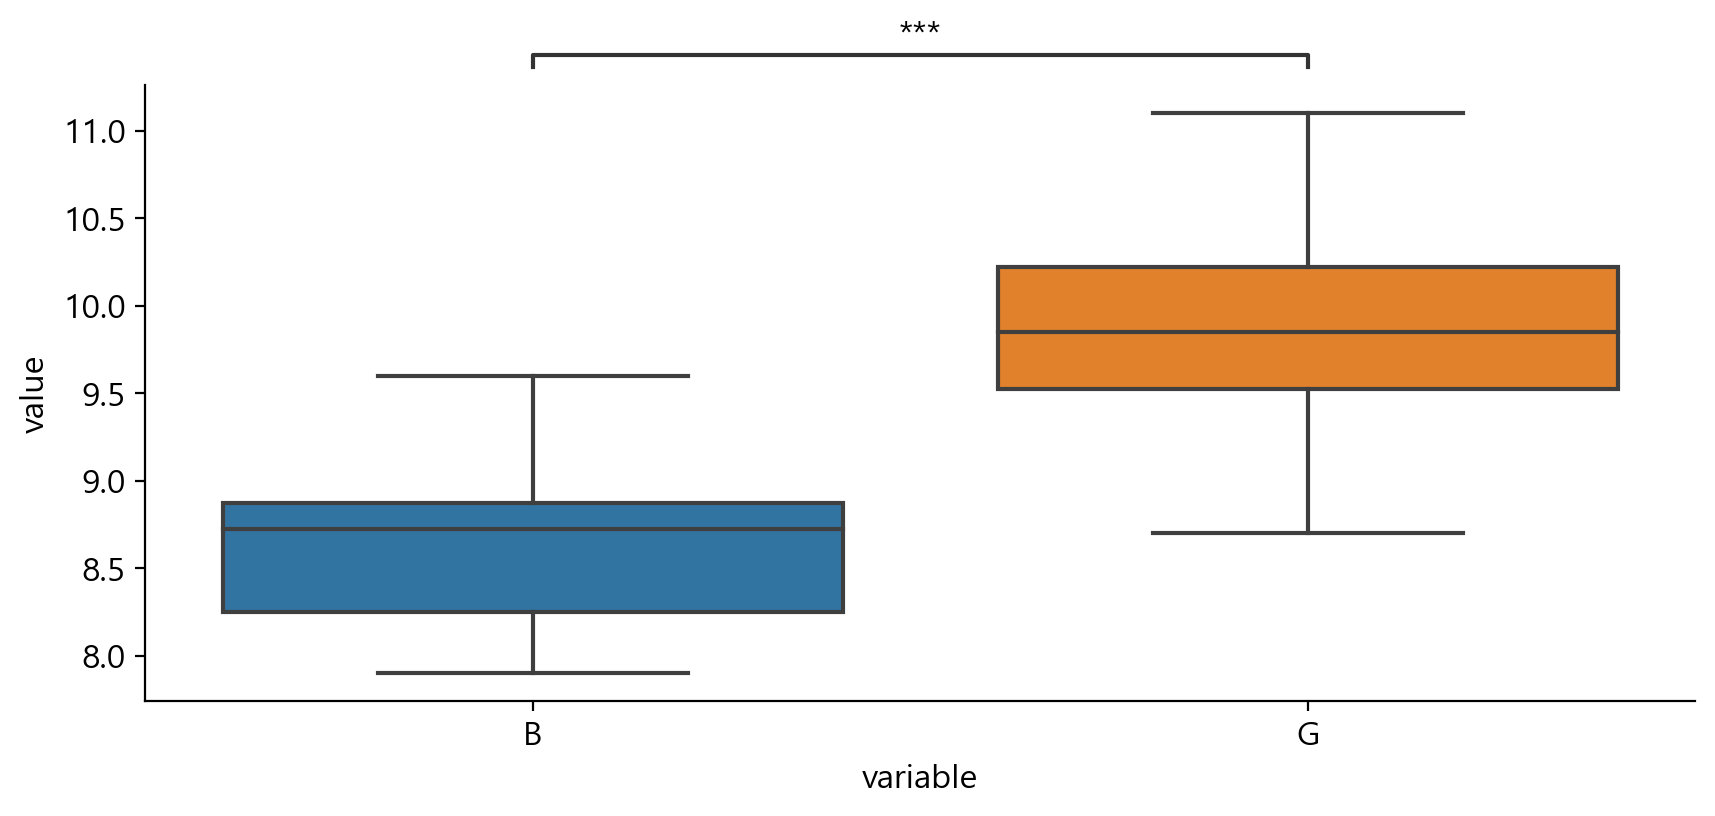

In [10]:
my_pvalue1_anotation(df, test="t-test_ind", target='value', hue='variable', pairs=[('B', 'G')])

## 예제 (3) - 대응 표본 T검정 : 사슴의 다리 길이 비교

### [1] 데이터 가져오기

In [11]:
origin = my_read_excel("https://data.hossam.kr/mldata/deer.xlsx", index_col='사슴', info=False)
my_pretty_table(origin.head())

+--------+----------+----------+
|   사슴 |   앞다리 |   뒷다리 |
|--------+----------+----------|
|      1 |      138 |      142 |
|      2 |      136 |      140 |
|      3 |      147 |      144 |
|      4 |      139 |      144 |
|      5 |      143 |      142 |
+--------+----------+----------+


### [2] 정규성, 등분산성 검정

In [12]:
df = melt(origin)
my_pretty_table(df.head())

+----+------------+---------+
|    | variable   |   value |
|----+------------+---------|
|  0 | 앞다리     |     138 |
|  1 | 앞다리     |     136 |
|  2 | 앞다리     |     147 |
|  3 | 앞다리     |     139 |
|  4 | 앞다리     |     143 |
+----+------------+---------+


In [13]:
my_normal_equal_var_1field(df, xname='value', hue='variable')

+----------+-------------+-----------+----------+
| field    |   statistic |   p-value | result   |
|----------+-------------+-----------+----------|
| 앞다리   |       1.824 |   0.40172 | True     |
| 뒷다리   |     1.37696 |  0.502339 | True     |
| Bartlett |    0.246657 |  0.619439 | True     |
+----------+-------------+-----------+----------+


### [3] 대응 표본 T검정

In [14]:
my_ttest_rel(origin, '앞다리', '뒷다리')

+--------------------------------+-------------+-----------+-------+-------+------------------------+
|                                |   statistic |   p-value | H0    | H1    | interpretation         |
|--------------------------------+-------------+-----------+-------+-------+------------------------|
| ('t-test_paired', 'two-sided') |      -3.414 |     0.008 | False | True  | μ(앞다리) != μ(뒷다리) |
| ('t-test_paired', 'less')      |      -3.414 |     0.004 | False | True  | μ(앞다리) < μ(뒷다리)  |
| ('t-test_paired', 'greater')   |      -3.414 |     0.996 | True  | False | μ(앞다리) <= μ(뒷다리) |
+--------------------------------+-------------+-----------+-------+-------+------------------------+


### [4] 검정결과 시각화

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

앞다리 vs. 뒷다리: t-test paired samples, P_val:7.703e-03 t=-3.414e+00


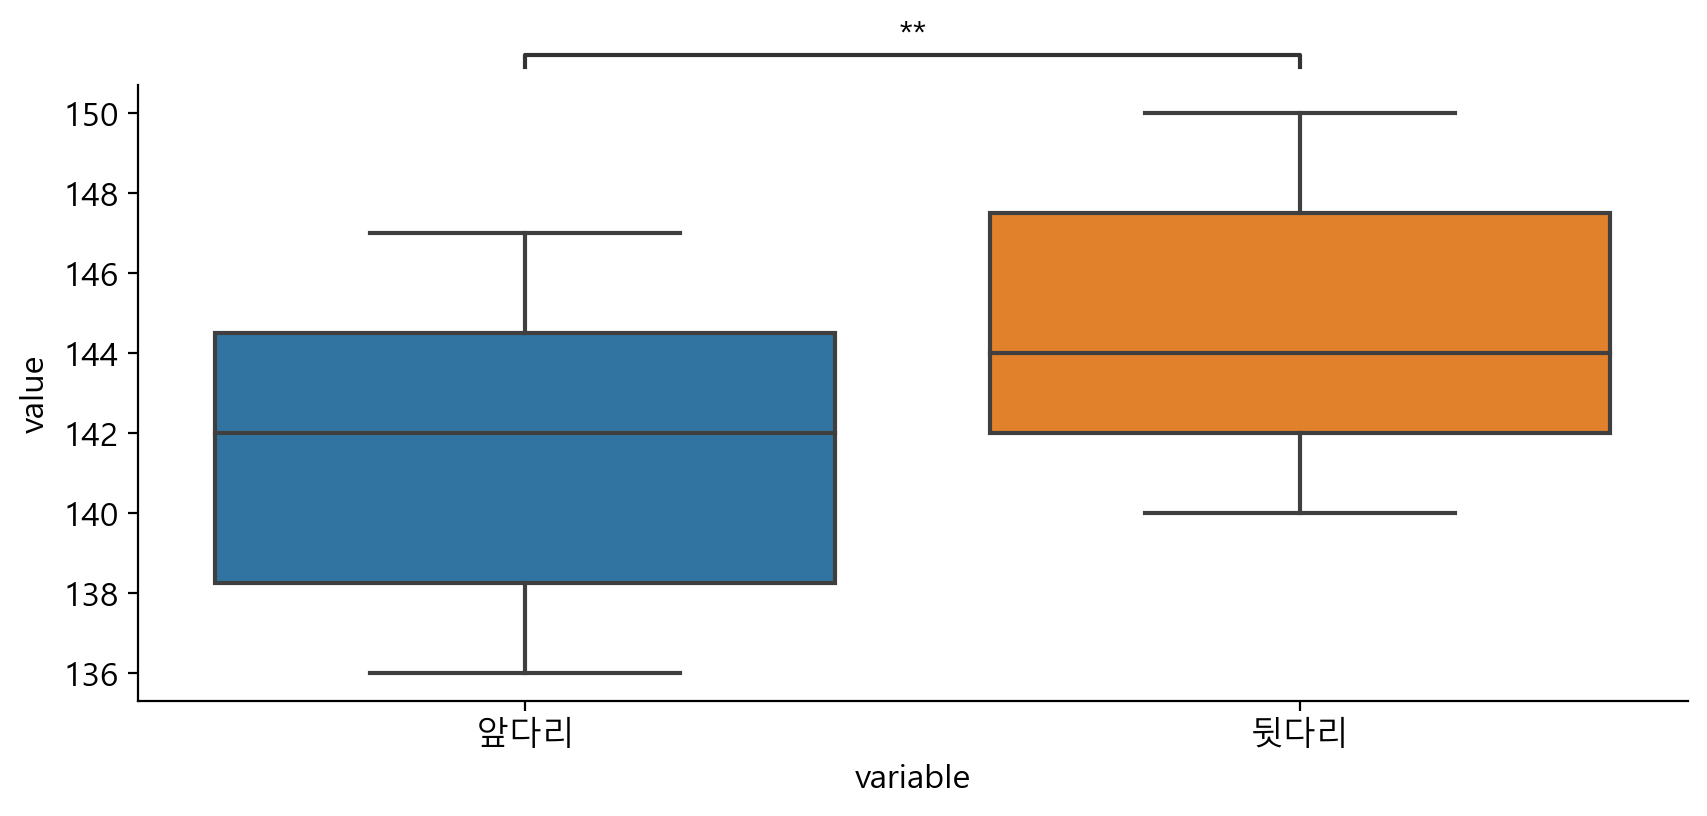

In [15]:
my_pvalue1_anotation(df, test="t-test_paired", target='value', hue='variable', pairs=[('앞다리', '뒷다리')])